In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np

In [2]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["figure.dpi"] = 200
purple = "#967BB6"

In [3]:
purple = "#967BB6"
hcn = pd.read_parquet('hcn.pq')

In [4]:
hcn.head()

,index,counts,local_frame,frame,time,n_atoms
64,CHN,1,4073,4073,0.050912,3
86,CHN,1,636,8636,0.107950,3
96,CHN,1,898,8898,0.111225,3
135,CHN,1,2189,10189,0.127362,3
149,CHN,1,2232,10232,0.127900,3


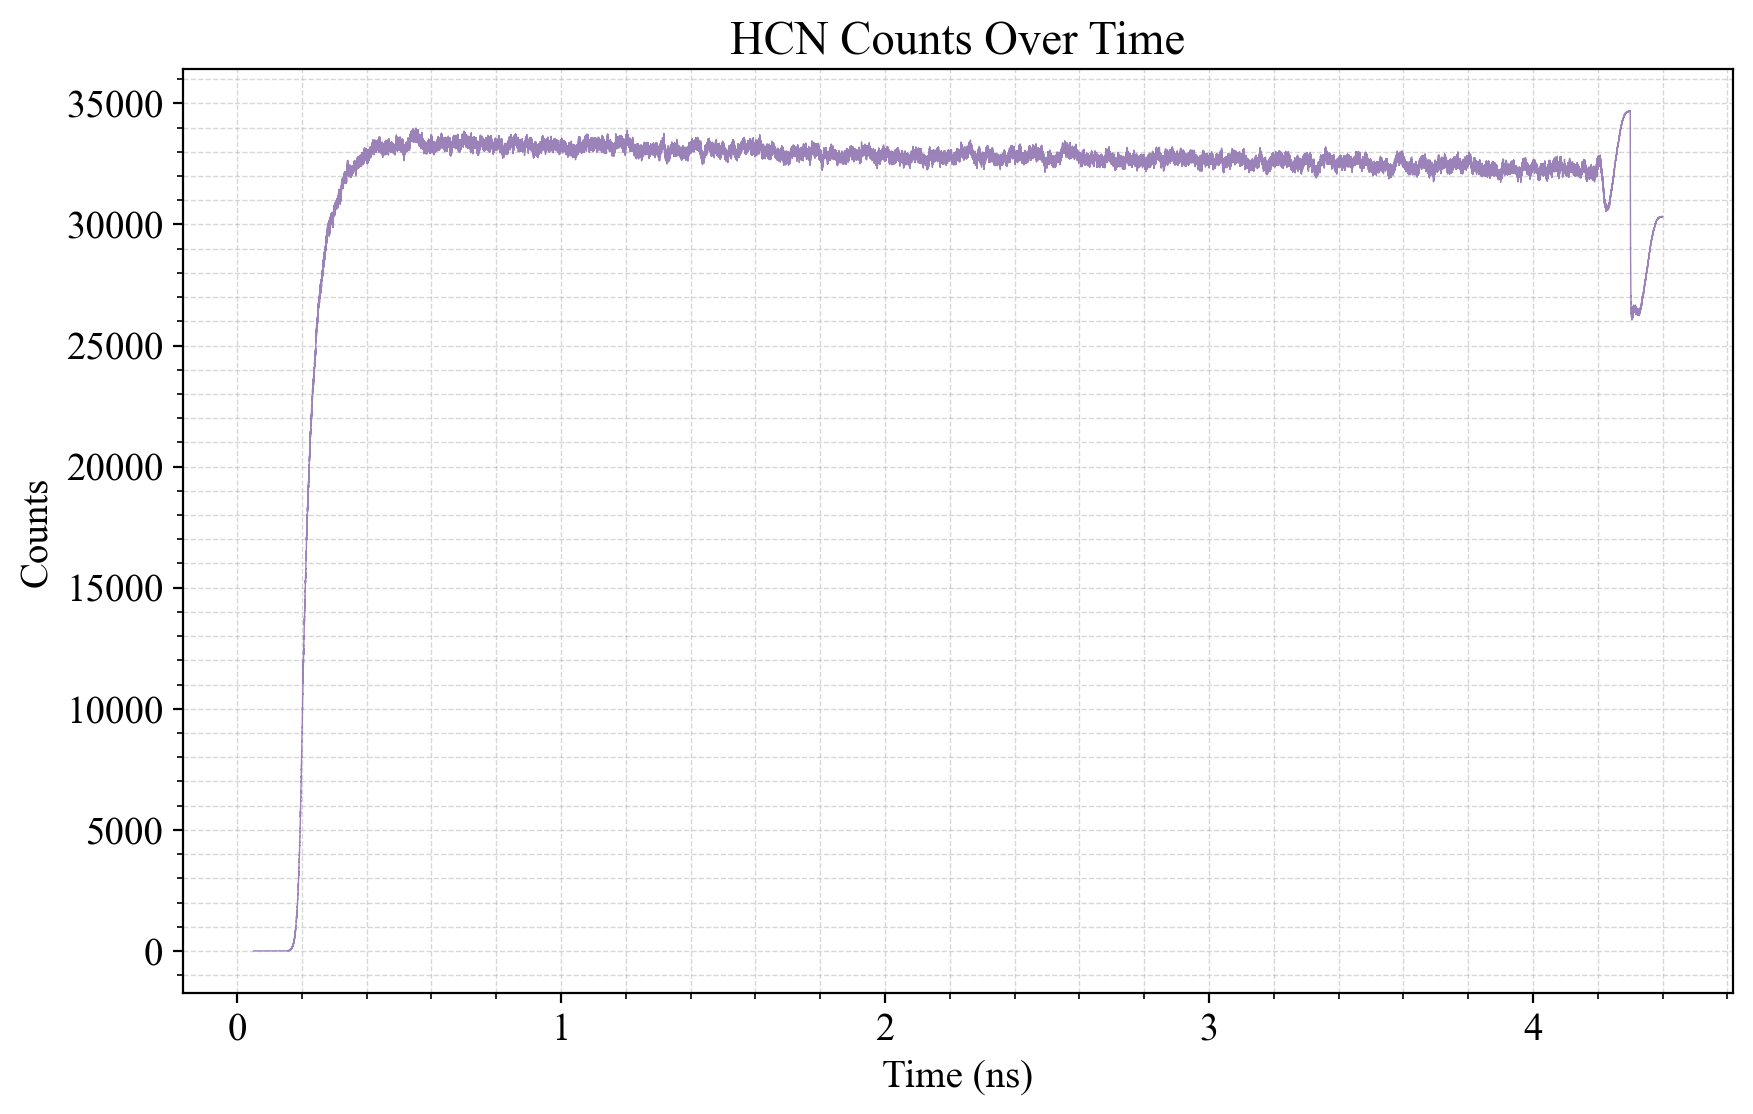

In [5]:
sns.lineplot(x=hcn["time"], y=hcn["counts"], linewidth=0.5, alpha=0.95, color=purple)

plt.xlabel("Time (ns)")
plt.ylabel("Counts")
plt.title("HCN Counts Over Time")

# Enable minor ticks for better axis detail
plt.minorticks_on()

plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)
plt.show()


In [5]:
original_df = pd.read_parquet('original_merged_mol.pq')

original_df[original_df['name'] == 'Alanine']

,frame,local_frame,formula,flatten_formula,smiles,name,atom_indices,time
0,13580,5580,C3H7NO2,CCCHHHHHHHNOO,CC(C(=O)O)N,Alanine,"[2282068, 3147562, 5732382, 6405111, 6635533, ...",0.169750
0,13587,5587,C3H7NO2,CCCHHHHHHHNOO,CC(C(=O)O)N,Alanine,"[2282068, 3147562, 5732382, 6405111, 6635533, ...",0.169838
0,13893,5893,C3H7NO2,CCCHHHHHHHNOO,CC(C(=O)O)N,Alanine,"[996336, 5206026, 6971035, 7139424, 7497366, 7...",0.173662
0,13895,5895,C3H7NO2,CCCHHHHHHHNOO,CC(C(=O)O)N,Alanine,"[996336, 5206026, 6971035, 7139424, 7497366, 7...",0.173687
0,14043,6043,C3H7NO2,CCCHHHHHHHNOO,CC(C(=O)O)N,Alanine,"[876986, 4586532, 8043792, 8101632, 8101633, 8...",0.175537
...,...,...,...,...,...,...,...,...
0,349306,5306,C3H7NO2,CCCHHHHHHHNOO,CC(C(=O)O)N,Alanine,"[3764775, 4775885, 7080722, 8302112, 9028804, ...",4.366325
0,349307,5307,C3H7NO2,CCCHHHHHHHNOO,CC(C(=O)O)N,Alanine,"[3764775, 4775885, 7080722, 8302112, 9028804, ...",4.366338
0,349508,5508,C3H7NO2,CCCHHHHHHHNOO,CC(C(=O)O)N,Alanine,"[3764775, 4775885, 7080722, 8302112, 9028804, ...",4.368850
0,349706,5706,C3H7NO2,CCCHHHHHHHNOO,CC(C(=O)O)N,Alanine,"[3764775, 4346305, 4775885, 7080722, 8302112, ...",4.371325


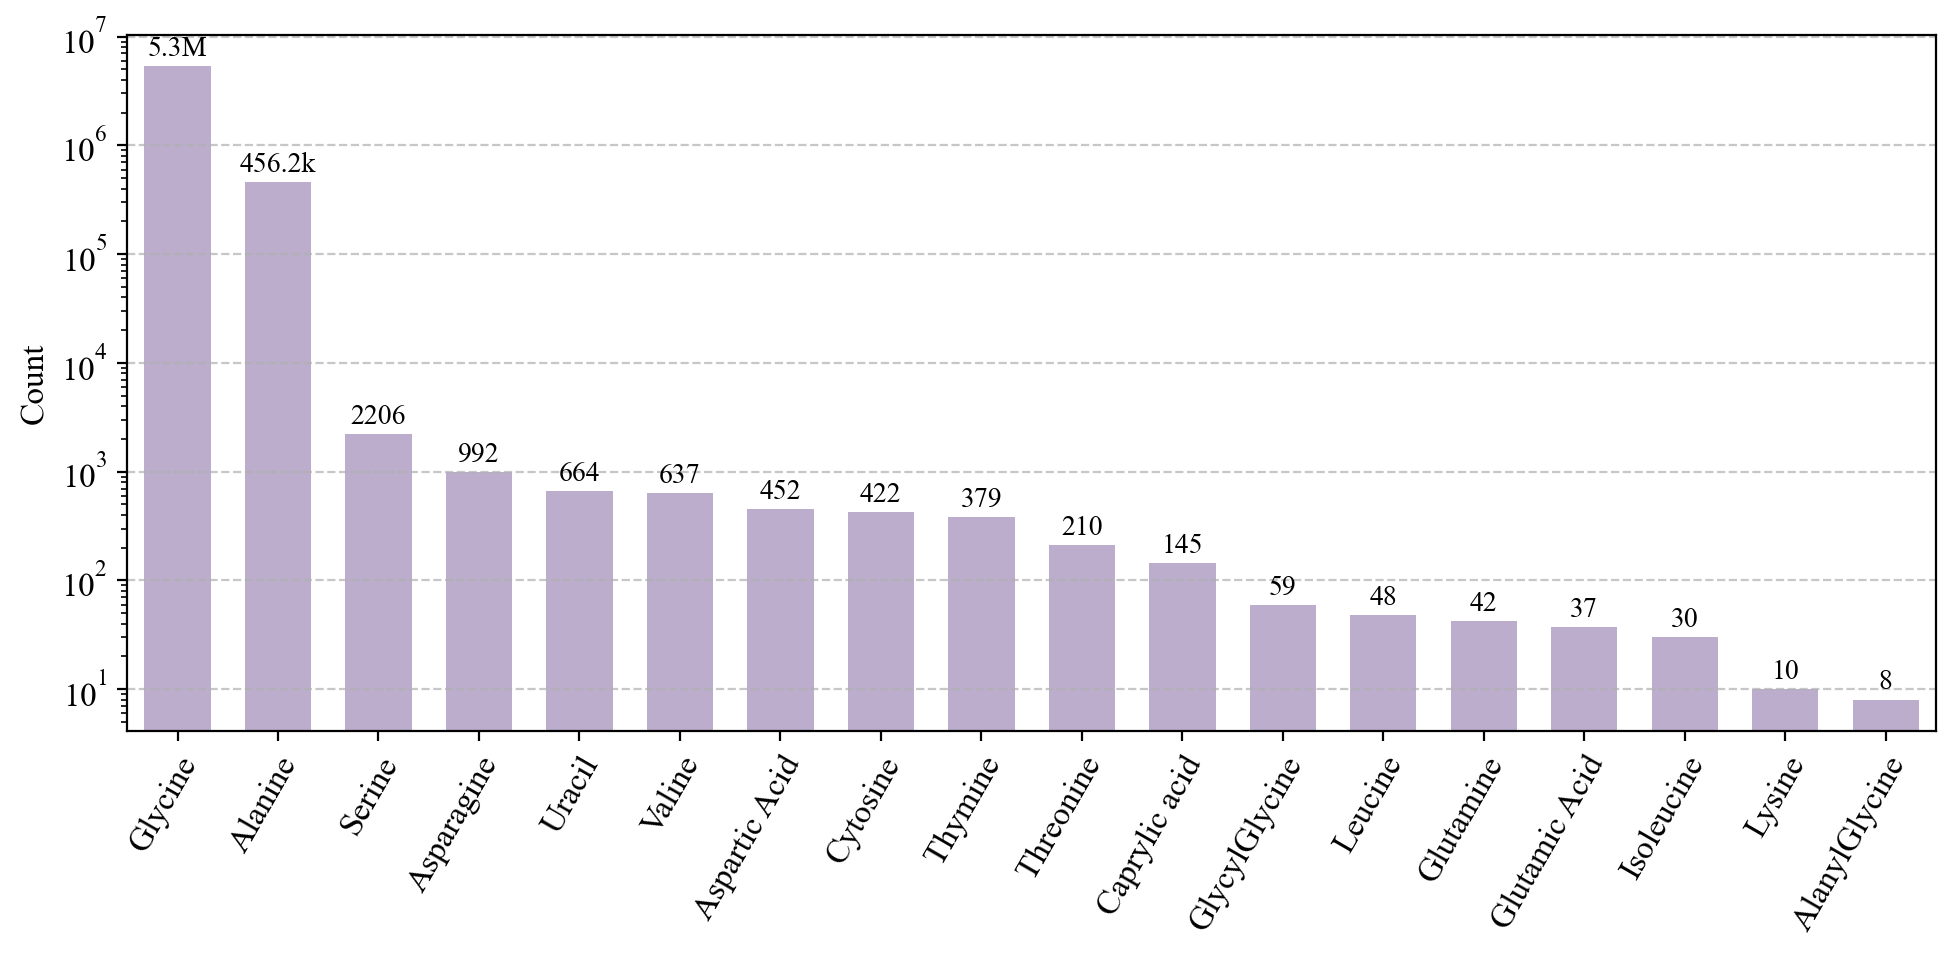

In [6]:
name_counts = original_df["name"].value_counts()

# Plot bar chart
plt.figure(figsize=(10,5))
ax = sns.barplot(x=name_counts.index, y=name_counts.values, color=purple, width=0.66, alpha=0.65)
plt.yscale('log')

# Function to format large numbers
def format_number(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.1f}M"  # Convert to millions
    elif value >= 10_000:
        return f"{value/1_000:.1f}k"  # Convert to thousands
    else:
        return str(int(value))  # Keep as integer

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid log(0) issues
        plt.text(p.get_x() + p.get_width() / 2, height * 1.1,  # Adjust label position
                 format_number(height), ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel(None)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=60, ha='right', rotation_mode='anchor', fontsize=12)  # Rotate labels for readability
plt.yticks(fontsize=12)
# Show plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig('updated_original_counts.png')
plt.show()

/var/folders/gg/d8ll1f157js5d4n67jyq89jr0000gn/T/ipykernel_17911/1983817859.py:43: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,0.5e8)


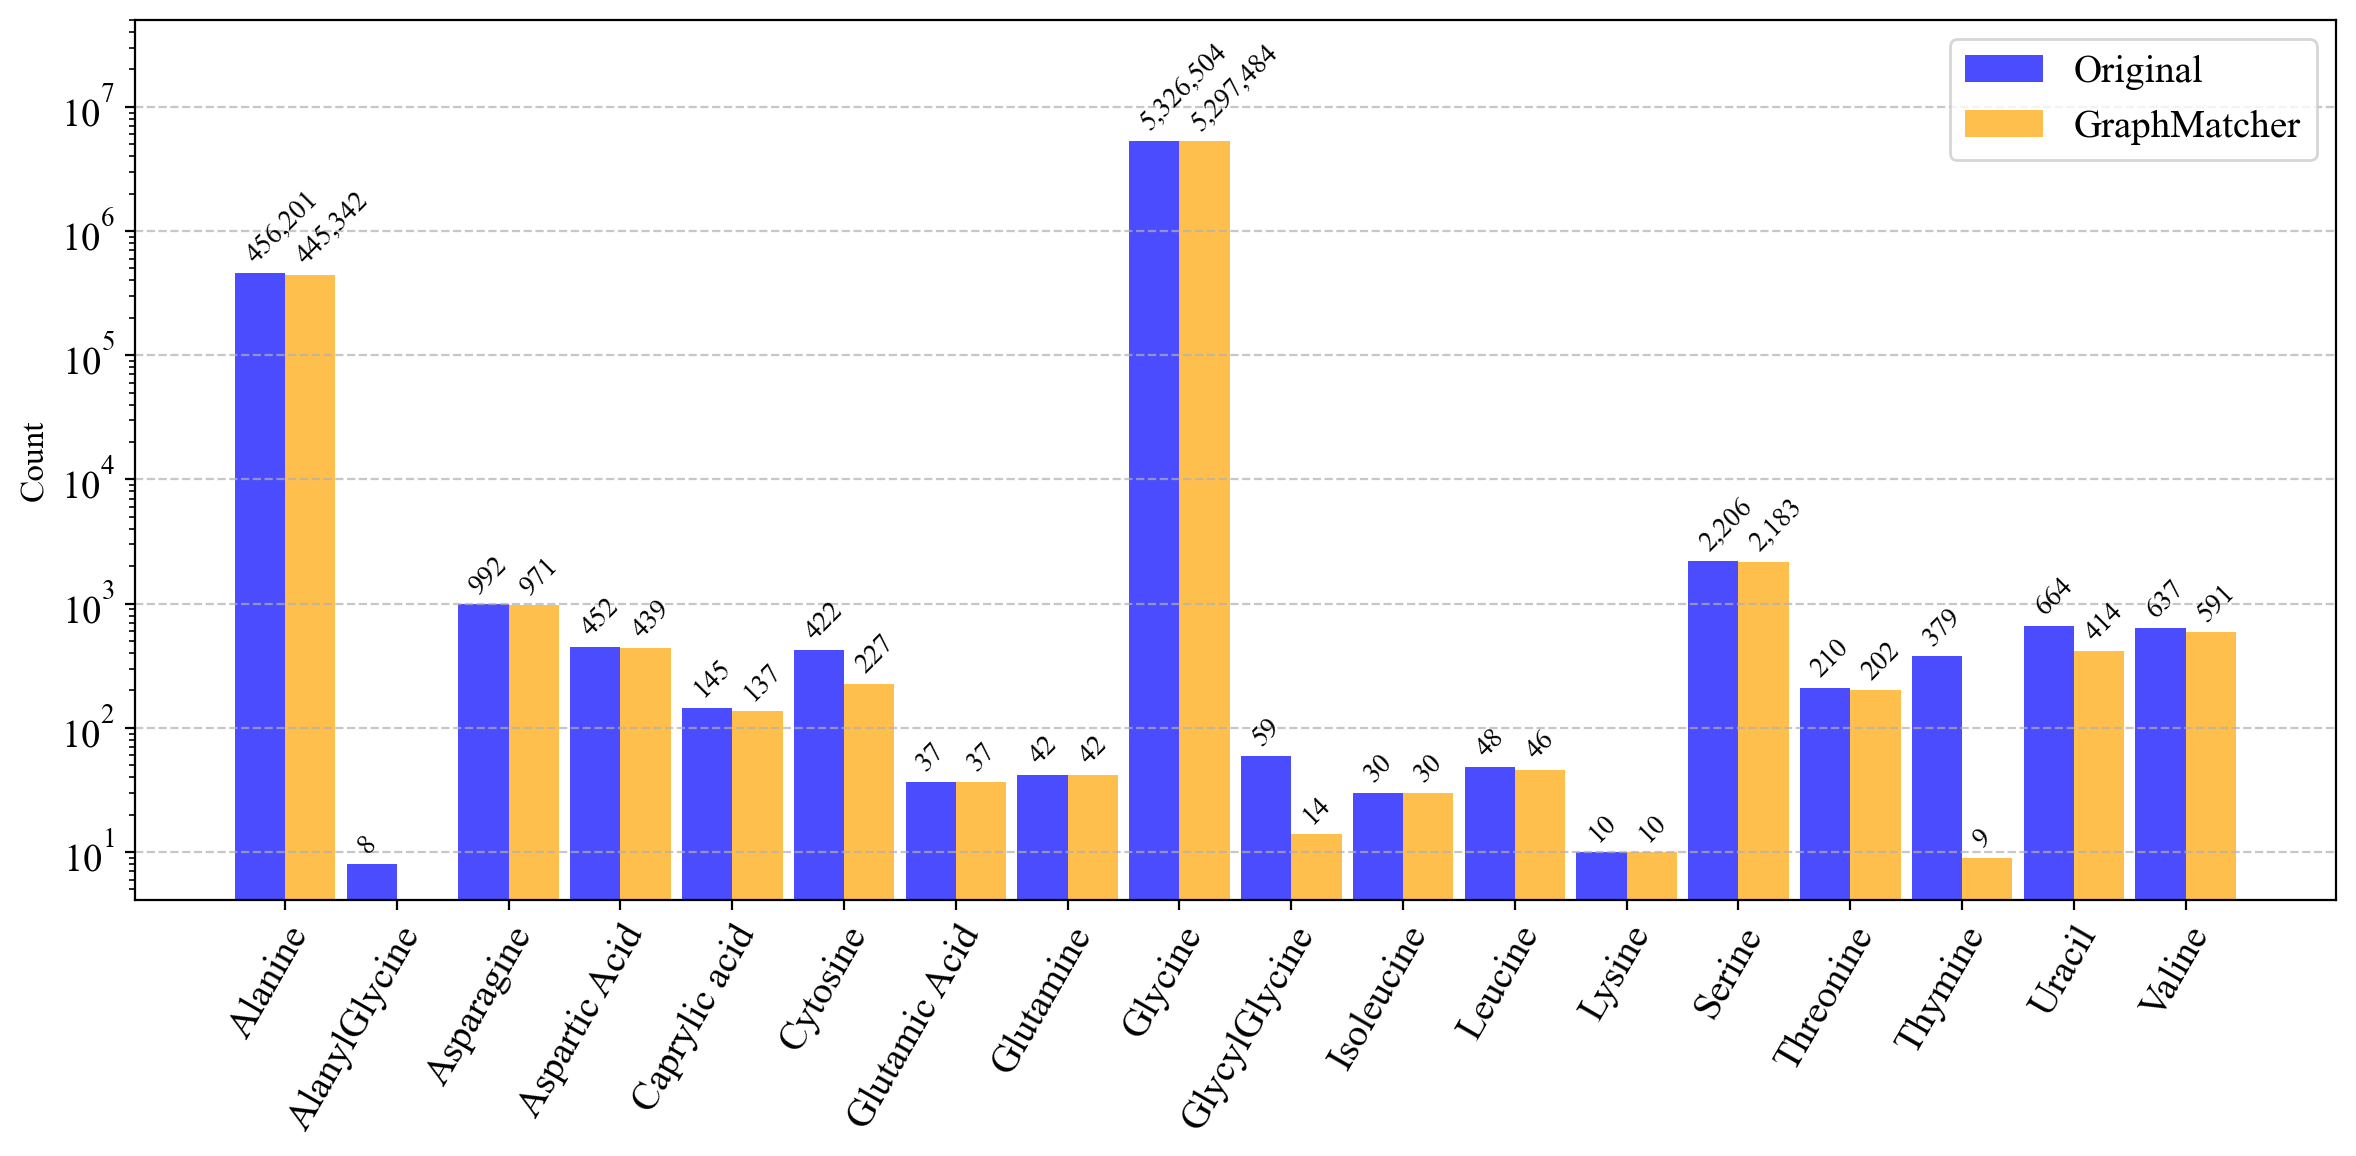

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load both datasets
original_df = pd.read_parquet('original_merged_mol.pq')
reduced_df = pd.read_parquet('merged_mol.pq')

# Get value counts for each dataset
original_counts = original_df["name"].value_counts()
reduced_counts = reduced_df["name"].value_counts()

# Align datasets by including all names
all_names = sorted(set(original_counts.index).union(set(reduced_counts.index)))
original_counts = original_counts.reindex(all_names, fill_value=0)
reduced_counts = reduced_counts.reindex(all_names, fill_value=0)

# Define bar width and positions
x = np.arange(len(all_names))  # X-axis positions
width = 0.45  # Width of bars

# Create figure
plt.figure(figsize=(12,6))
bars1 = plt.bar(x - width/2, original_counts, width=width, label="Original", color="blue", alpha=0.7)
bars2 = plt.bar(x + width/2, reduced_counts, width=width, label="GraphMatcher", color="orange", alpha=0.7)

# Log scale
plt.yscale('log')

# Add exact number labels on top of each bar, rotated 45 degrees
for bars in [bars1, bars2]:  # Iterate over both bar groups
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Avoid log(0) issues
            plt.text(bar.get_x() + bar.get_width()/2, height * 1.1,  # Adjust position
                     f"{int(height):,}", ha='left', va='bottom', fontsize=10, color='black', 
                     rotation=45, rotation_mode='anchor')  # Rotate labels 45 degrees

# Labels and title
plt.ylabel("Count", fontsize=12)
plt.xticks(x, all_names, rotation=60, ha="right", rotation_mode="anchor")
plt.ylim(0,0.5e8)
plt.legend()

# Grid and show plot
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig('updated_graphmatcher.png')
plt.show()

In [9]:
print(original_counts.sum())
print(reduced_counts.sum())

5789046
5748178


In [15]:
reduced_counts.drop('Glycine').sum()

np.int64(450694)

In [16]:
largest_df = pd.read_parquet('smaller_largest_mol_over_time.pq').reset_index(drop=True)
print(largest_df)

                                                    index   counts      time  \
0                                                   CHHHH  1400000  0.000000   
1                                                   CHHHH  1400000  0.000012   
2                                                  CHHHNO        3  0.000025   
3                                                HHHHHHNN        1  0.000037   
4                                              CHHHHHHNNO        4  0.000050   
...                                                   ...      ...       ...   
402416  CCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHHH...        1  4.399962   
402417  CCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHH...        1  4.399975   
402418  CCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHHH...        1  4.399975   
402419  CCCCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHH...        1  4.399987   
402420  CCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHHH...        1  4.399987   

        n_atoms  
0             5  
1  

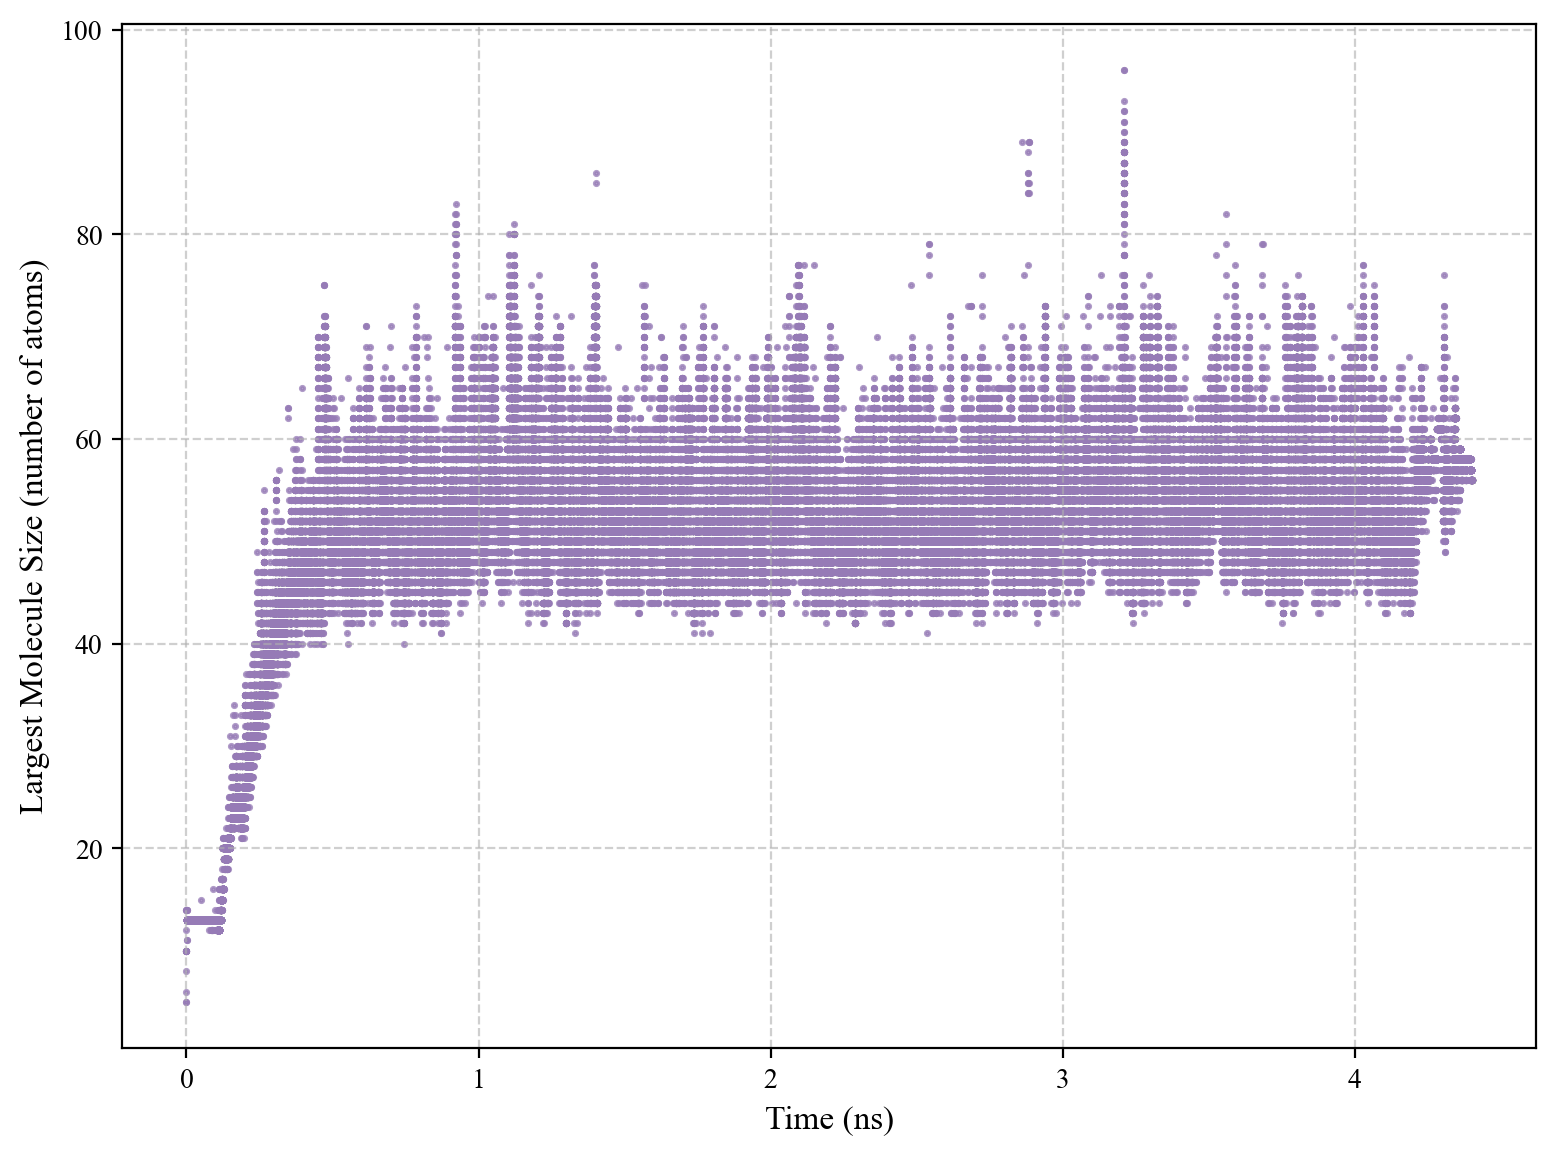

In [39]:
# Select the row with the largest molecule at each unique time value
df_largest_molecule = largest_df.loc[largest_df.groupby('time')['n_atoms'].idxmax()][['time', 'n_atoms']]

# Plot n_atoms vs time
plt.figure(figsize=(8,6))
plt.scatter(df_largest_molecule['time'], df_largest_molecule['n_atoms'], marker='.', s=10, alpha=0.75, color=purple)

# Labels and title
plt.xlabel("Time (ns)", fontsize=12)
plt.ylabel("Largest Molecule Size (number of atoms)", fontsize=12)

# Adjust ticks for readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.savefig('updated_largest_mol_vs_time.png')
plt.show()